# Machine Learning Project to compare digit classifications among data sets

*By Jennifer Pyle, May 14, 2020*

# Introduction

For my project, I to applied nonlinear logistic regression to train a classifier of Street View House Numbers(SVHN) data **[2]**. I based my project off of the NeuralNetworkClassifier from homework A4, with which I classified the MNIST data set. I chose the cropped format of the SVHN data set by the university of stanford **[1]** containing 32x32 images centered around a single character. Compared to the origional images, the cropped images were much less difficult to classify due to reducing the amount of the distractions on the sides. Below is the first 100 images with the target label appearing above each image.

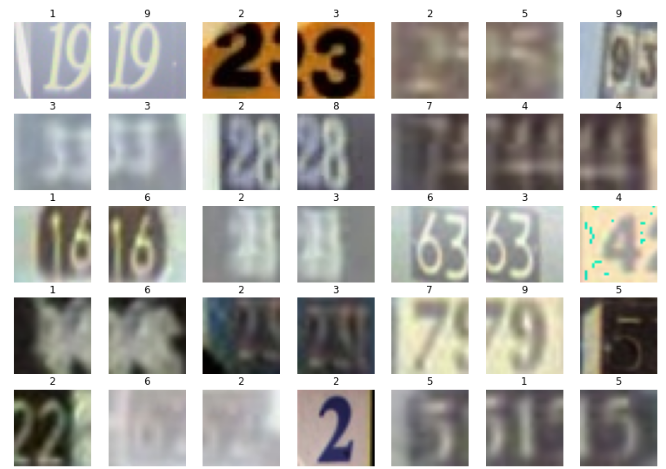


Conveniently, the data had already been divided into a training, testing, and an extra set. I used a portion of the extra data for my validation set. According to the source, the SVHN data is very similar to the MNIST data set, but the SVHN data "comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images"

The goal of my project was to analyze how the classification of the MNIST data compares to the SVHN data. I was able to conclude that the two data sets had very different problems with classifications. The digits that the MNIST classifications did poorly on was due to poor penmanship. While the network training the SVHN data performed poorly on different numbers due to various obstructions in the images. The MNIST data had a significantly higher percent correctly classified samples compared to the SVHN data.

# Methods

The code that I used for my project is the exact code from A4 with some slight alterations to fit the new data. The code includes an Optimizer class that writes its contents to another file, which is imported and called later in the NeuralNetwork and NeuralNetworkClassifier classes. The NeuralNetworkClassifer class uses methods 'makeIndicatorVars', 'softmax' to make variables to identify classes and get probabilities that sum to one. The 'error_convert_f' gets converted to negative log likelihood and gets negated to maximize the likelihood of the probabilities. The 'error_f' is returns the negative log likelihood mean and is then minimized by the optimizer method. the 'gradient_f' function calculates the derivitave of the neg_log_likeihood by subtracting the probabilities from the indicator variables and calls softmax on the output of the output layers and also gets negated to maximize the probabilities. I chose to use adam for my optimization.

Most of the changes that I made to the code had to do with reshaping my data and loading in a different file format. I ran into some trouble with computer memory when I tried to classify the SVHN data with the origional training data size of 73257. This was an issue because the SVHN data has 3 color channels compared to the MNIST data, which only has one. The SVHN data has 32x32 pixels on 3 channels, which after reshaping resulted in a matrix with the shape (73257, 3072). This was too large for the capacity of my computer memory and I had to reduce the training data to 20,000 samples and 15,000 samples for the validation and test data. I attempted to make a convolutional neural network to reduce the weights and make the classification more efficient but I was unable to successfully convert the 3 color channels of the SVHN data to 1 channel. However, the reduction in samples worked well enough to still use the NeuralNetworkClassifier code.

Because of the reduction in samples of the SVHN data, I also reduced the training samples of the MNIST data to 20,000 samples in order to maintain a consistent comparison of the two data sets being classified. The code cell below shows how I reduced the data from homework assignment A4.


The final shapes of the training, validation, and test data for **MNIST** are:

(20000, 784) (20000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


Training the reduced data with 100 epochs, a learning rate of 0.01, and one hidden layer with 5 units resulted in this error trace:

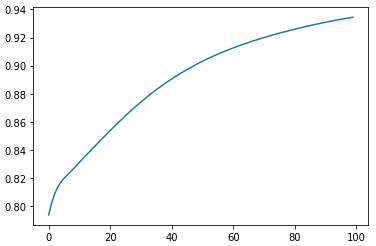

I want to maximize the probability of the data. The error values can be between 0 and 1; for the maximum likleyhood the error trace would be 1. A value of 1 would mean all the classifications are correct and exactly fit the training data as the correct class is being produced for every sample.

The error trace gets up to Error=0.93388, which is very high. I compared this number to the error trace of the origional non-reduced samples which had a final error of Error=0.93447. I determinded that reducing the MNIST data did not significantly compromise the performance of the network, so I decided that it was safe to keep using the reduced data.

Next, I classified the reduced MNIST data with 500 epochs and a learning rate of 0.01 with various hidden layer structures depicted below. The most successful network had a hidden layer structure [30,30] corresponding to a test percent of correctly classified data of 100%. Below is a table representation of percent of correctly classified samples in each partition.

## SVHN data

After reading in the SVHN data using scipy.io(because of the .mat format) the resulting shapes of the data were:

Training the SVHN data with 100 epochs, a learning rate of 0.01, and one hidden layer with 5 units(Exact same structure as MNIST error trace graph) resulted in this error trace:
 
 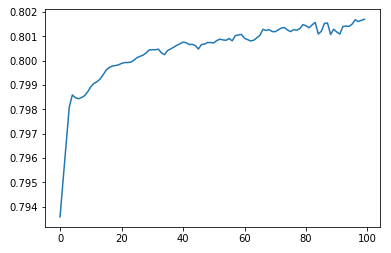

Its likley that the graph is jagged compared to the error trace of the MNIST data due to the distractions in the background of the digits. My hypothesis is that there is much larger variations in blurriness, distortion, and magnitude of distractions on the sides of the images of the SVHN. This makes sense that the error trace would be less consistent because it is more likley for the SVHN images to have outliers in the classification accuracy.

 
### SVHN trial # 1
I trained the SVHN samples with more basic hidden layer structures to get a general idea of how the data performs. The highest validation accuracy occured with 3 hidden layers with 10 units each.



### SVHN trial # 2
I also experimented with the same exact network structure as the MNIST data. The validation set had the highest accuracy with the [30,30,30] hidden layer structure.

### SVHN trial # 3

I wanted a slightly higher test accuracy so for my final trial I increased the number of epochs to 800 and decreased my learning rate to 0.001. The highest validation percent correct occured with two hidden layers with 30 units each corresponding to a test percent correct of 84.25.

# Results

**The most successful network structure for SVHN from all the trials based on the validation percent correct of 90.37 is [30,30] with a test percent correct of 84.25**

Retraining the network with the hidden layer structure of [30,30] resulted in a test accuracy of **84.73%**. The results are shown below:

#### Confusion Matrix for SVHN data
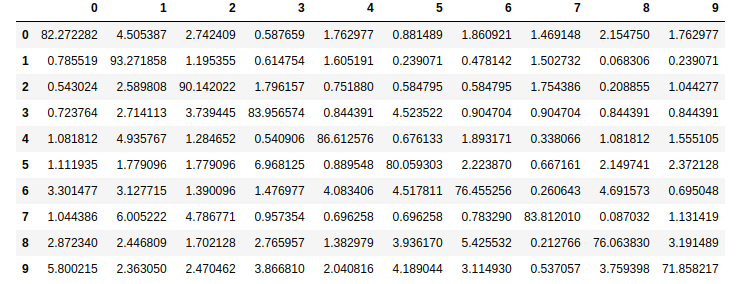
The confusion matrix shows the predicted classes for each sample and the true classes for each sample. In this network, the images from the test set that the network's probability of the correct class is the closest to zero are **6, 8, and 9**. 

As shown in the confusion matrix above, images of the number 6 are only classified correctly 76.45% of the time. 4.5% of images of the number 6 are classified as a 5, followed closley by 4% that are classified as 4's. 
*Images from the SVHN data of 5's, 6's, and 8's are shown in the image below*
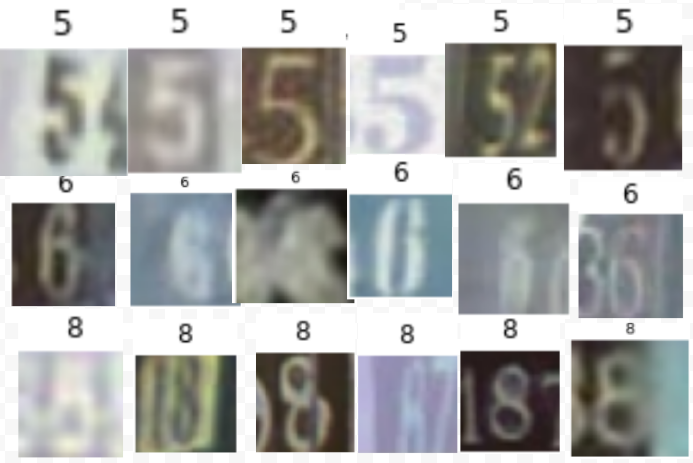
I think that my network learns to classify 6's based on the distinct space that seperates the tail of the 6 to the bottom part of the 6. The shape of the number 5 has a similar shape on the top half of how its shaped, especially the top righthand side of the number. If the shading at the bottom left of the 6 is not dark enough to look connected/continuous, it could be mistaken for a gap, which would make it resemble a 5. In terms of the 6's being classified as 8's, many of the 6's, such as the third one in the first row look very similar to 8's because of how long and curved downward the tail of the 6 is. If there isn't a distinct space between underneath the tail of the 6, it could be easily mistaken for being an 8. I think this would be the main reason that 6's are misclassified as 8's.

Along with this, 76 % of images with the number 8 are classified correctly. 5.4% of the images containing the number 8 are classified as 6's followed by 3.93% classified as 5's. *Images from the SVHN data of 6's, 8's, and 5's are shown in the image below*
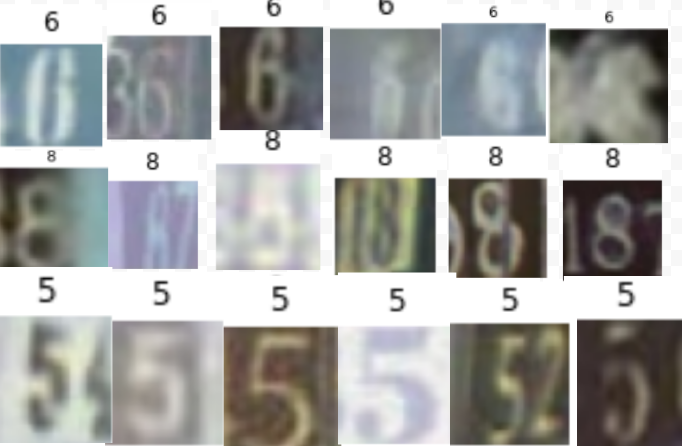 
My network may have trouble classifing 8's because of how similar the digit 8 and 6 are shaped. I think that my network learns to classify 6's based on the distinct space underneath the tail of the 6. In some images of 8's there is inconsistent shading on the number, which the network could detect a 6-like shape if the shading is inconsistent along the right side of the 8. This inconsisent shading could make the upper righthand side of the 8 resemble the tail of a 6. Also it's pretty obvious that many of the images have significant blurriness, making the numbers blend into the background and lose their distinct line shapes. I think that my network learns to classify 5's in a similar way, detecting the empty space on the upper right and bottom left of the 5 shape. Again, I think that 8's may be misclassified as 5's due to blurriness and inconsistent shading in areas that are critical for distinguishing 5's from 8's. 

Finally, 71.86% of images containing 9's are classified correctly. 5.8% of the images are classified as 0's, while 4.18% of the images are classified as 5's. *Images from the SVHN data of 5's, 9's, and 0's are shown in the image below*
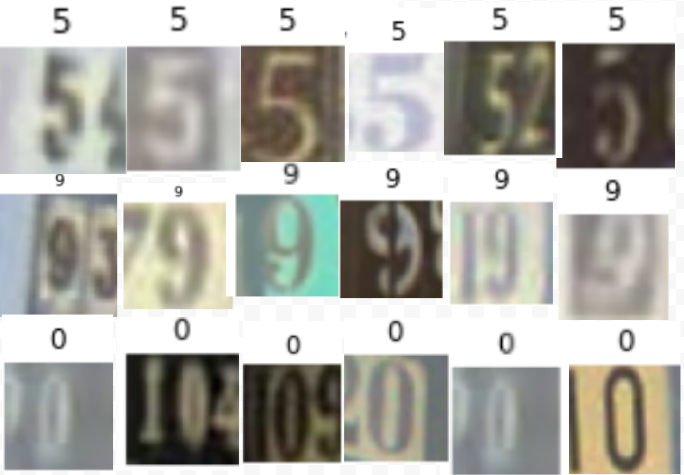
I think my network learns to classify 9's with their distinct gap on the lower righthand side, along with the continuous top half of the 9 and the horizontal line in the middle of the 9. Again, I think that the blurriness, distortion, and inconsistent shading may make the 9's appear as 0's, having the distinct space at the lower half of the 9 disappear due to blurriness. Also 9's may be misclassified as 5's because both the 9's and 5's have a horizontal line in the middle of the number, and a gap on the lower lefthand corner of the number. If the shading in the upper righthand corner of the 9 is not dark enough, it makes sense that it could be misclassified as a 5.

####  MNIST classifications
Classifing the reduced MNIST data again on the most successful network from earlier with 500 epochs, two hidden layers with 30 units in each, and a learning rate of 0.01, resulted in a **99.99%** of correctly classified images.

#### Confusion Matrix for MNIST data
The confusion matrix for the MNIST data that was trained with the same network structure as the SVHN above and the same amount of training samples, but with only 500 epochs.

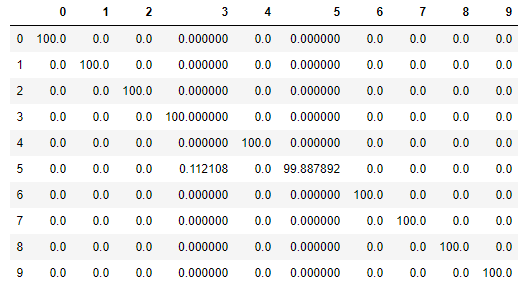

It appears that the only digit that the network has a lower probability of classifing the samples to the correct class is **5**, which is sometimes classified as a **3**. *Images from the MNIST data of 3's and 5's are shown in the image below*
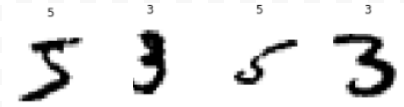
Looking at the images of 5's and 3's above, it appears that the variations in human handwriting can make a 5 appear as a 3. This happens when the top half of the 5 is too close together to make a distinction between the hat of a 3 and the hat of a 5. The first image of a 5 *(in the above picture)* is a very good representation of this.

#### Comparing the classification accuracy of the data sets

Surprisingly, the two data sets did not have similatities in classification accuracy for each number. I was expecting the SVHN data to also have trouble classifing 5's and 3's. Based on the SVHN confusion matrix, this did happen, but to a much lesser degree compared to classifying other numbers. The SVHN set had much more complicated images, which introduced new obstacles such as distortion from camera angles, image blurriness, shading inconsistencies, lack of sharpness, color contrasts, obstructions blocking the view of the house numbers such as bushes and fences, and distractions along the sides of the images. All of these things especially affected the classification of the numbers 6, 8, and 9. I think that my network did not have as many problems with classifying 5 and 3 because the difficulty of classifing those digits in the MNIST data set occured due to non-consistent and non-regulated human handwriting. Some of the hand written digits appeared to be written with such poor penmanship that even I was unable to distinguish if the digit was a 5 or 3.

The final test percent correct for the MNIST data was **99.99%**, while the final test percent correct for the SVHN data was **84.73%**

I think that the MNIST data set had a huge advantage for classifying numbers due to the consistent black coloring of the digits on the plain white backgrounds. I think that this stark color contrast allowed my network to easily detect the digit without any sort of distraction or obstruction that could affect the classifications. Comparing this to the SVHN digits, my network with the SVHN data may have had trouble determining what was and what wasn't part of the number versus background environment.

However, I think the SVHN set did have an advantage in that the house numbers have a more consistent shape. This is because many of them are produced from a machine with templates. Also, some of the house numbers may have been produced off of the same machine, having the same font and shape. Because of this, it is slightly less likley that a 5 could be distorted so much that it could like a 3. In contrast, the hand-drawn digits will never be identical due to variation among human handwriting and also because hand-drawn digits are more likley to have varying organic shapes.

## Conclusions

Overall, I was able to get a better understanding of how neural networks, classifications, and optimizers work together after reading through the code more. I was able to look at how the complexity of images affect the performance of networks. I also looked online at other projects that classified the SVHN data, which was cool to see other ways to optimize. I especially learned a lot about reshaping data when I tried to convert the SVHN data to 1 channel. I also learned a lot about computer memory and how large amounts of data affect my computer.


The main challenges that I had with my project involved the amount of memory needed to train more complex RGB 3 channel images. I tried to convert the images from RGB(32x32x3) to 1 color channel grayscale(32x32x1) using tensors and torchvision's grayscale function. I was not successful in converting the images to 1 channel, so I had to heavily reduce the amount of samples I trained from 73,000 down to 20,000.

For my timeline, I ended up finishing the majority of my project the week before it was due(very bad idea). I really struggled with having a slow computer because training the data each time took a couple hours. I have two operating systems installed on my computer and all of my coursework for a different class was on a different operating system. This made it so I couldn't multitask and do other coursework while I waited for my data to be trained for hours. Looking back, I really should've trained my data overnight so I wouldn't have to sacrafice time waiting for it to complete.

### References

    [1] Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu, and A. Y. Ng, [Online]. Available: http://ufldl.stanford.edu/housenumbers/nips2011_housenumbers.pdf.The 


    [2] Street View House Numbers (SVHN) Dataset [Online]. Available: http://ufldl.stanford.edu/housenumbers. [Accessed: 14-May-2020].

In [2]:
import io
from nbformat import current
import glob
nbfile = glob.glob('Project Report.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Project Report.ipynb is 2669
